<a href="https://colab.research.google.com/github/Malu2810/lets-grow-more-task-6/blob/main/iris_flower_classifiction_oasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv("/content/Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

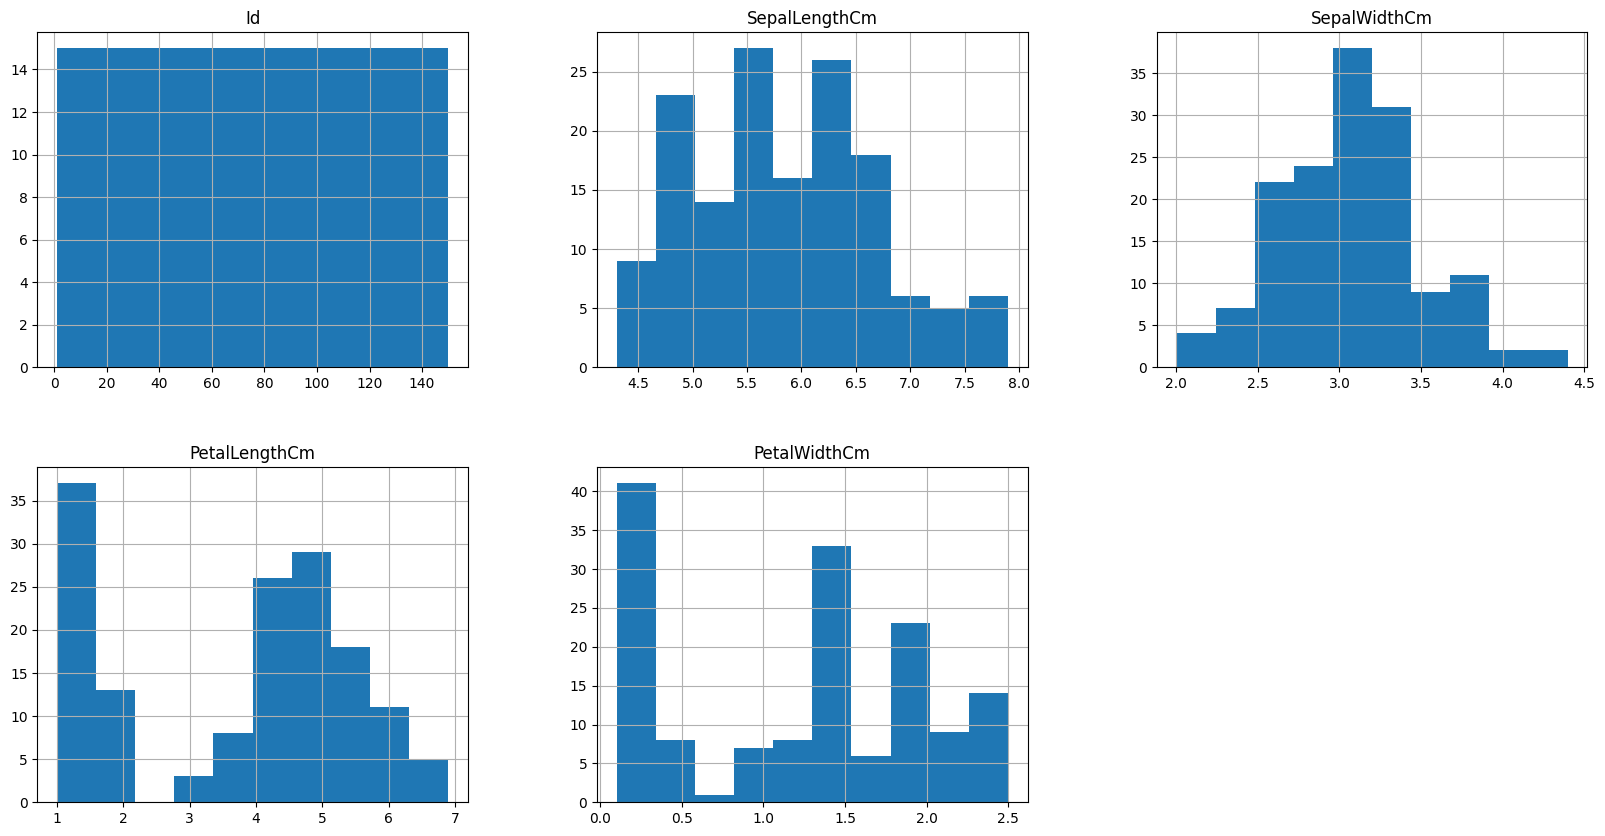

In [ ]:
df.hist(layout=(2,3),figsize=(20,10))
plt.show()

In [ ]:
df=df.drop("Id",axis=1)

In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Iris-setosa:0

# Iris-versicolor:1

# Iris-virginica:2

In [ ]:
df["Species"]=df["Species"].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [ ]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


<Axes: xlabel='SepalLengthCm'>

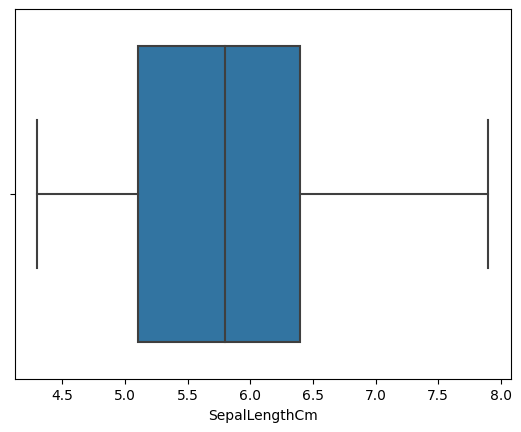

In [ ]:
sns.boxplot(x="SepalLengthCm",data=df)

<Axes: ylabel='SepalWidthCm'>

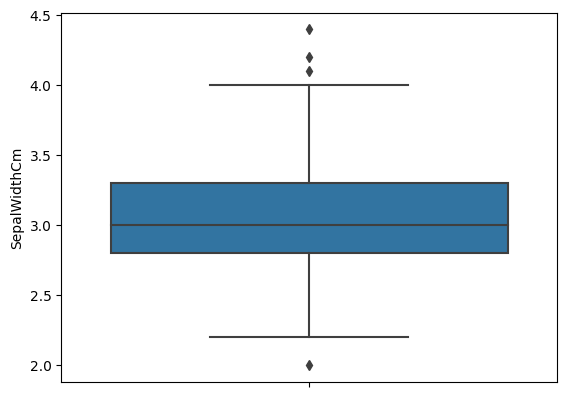

In [ ]:
sns.boxplot(y="SepalWidthCm",data=df)

In [ ]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['SepalWidthCm']>=4.0)[0]
lower_array = np.where(df['SepalWidthCm']<=2.2)[0]

In [ ]:
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

<Axes: ylabel='SepalWidthCm'>

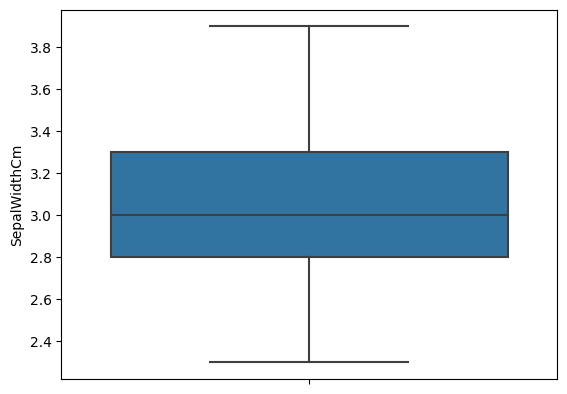

In [ ]:
sns.boxplot(y="SepalWidthCm",data=df)

<Axes: xlabel='PetalLengthCm'>

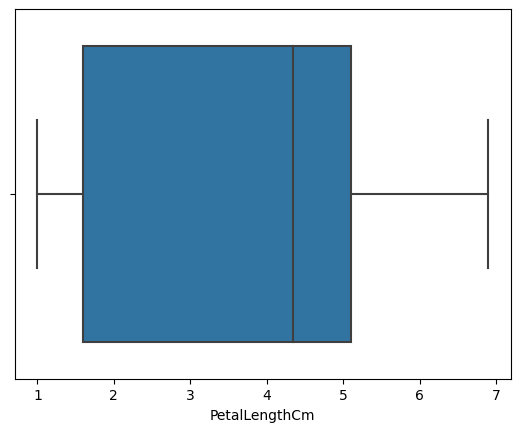

In [ ]:
sns.boxplot(x="PetalLengthCm",data=df)

<Axes: xlabel='PetalWidthCm'>

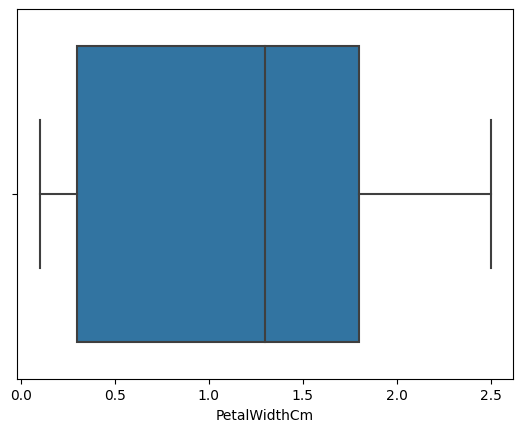

In [ ]:
sns.boxplot(x="PetalWidthCm",data=df)

<Axes: xlabel='Species', ylabel='count'>

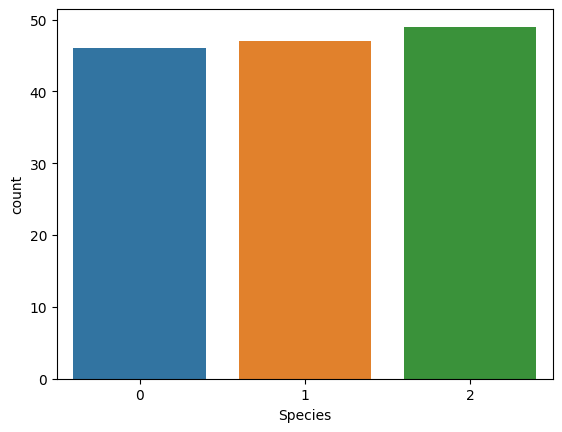

In [ ]:
sns.countplot(x="Species",data=df)

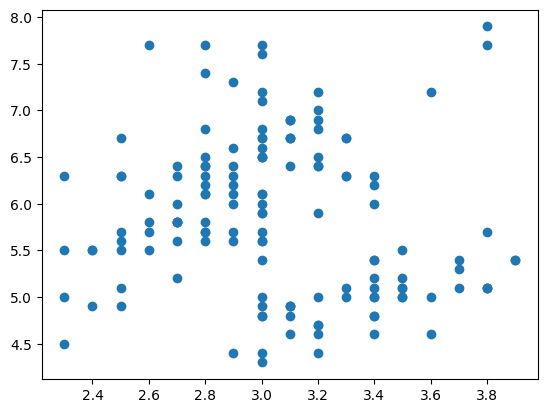

In [ ]:
plt.scatter(x="SepalWidthCm",y="SepalLengthCm",data=df)

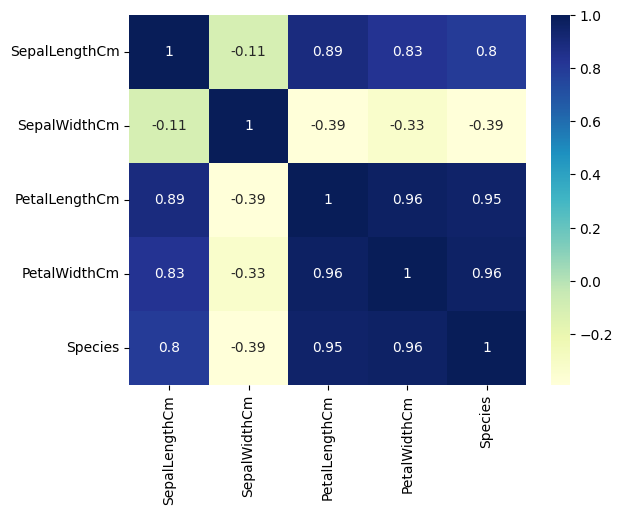

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
x=df.drop("Species",axis=1)
y=df["Species"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_std=st.fit_transform(x_train)
x_test_std=st.fit_transform(x_test)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train_std,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test_std)

In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  1.0


In [ ]:
model.coef_

array([[-1.07676085,  1.03533364, -1.78709066, -1.65729418],
       [ 0.56978597, -0.29391772, -0.33461223, -0.72023087],
       [ 0.50697488, -0.74141592,  2.12170289,  2.37752505]])

In [ ]:
model.intercept_

array([-0.28939754,  1.8848156 , -1.59541806])

In [ ]:
print("R2 score:",r2_score(y_test,y_pred))

R2 score: 1.0


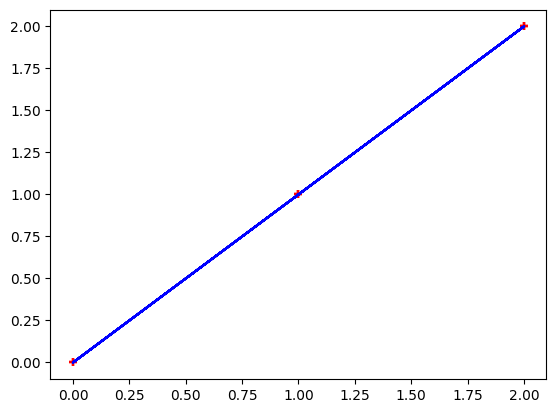

In [ ]:
plt.scatter(y_test,y_pred,color='red',marker='+')
plt.plot(y_test,y_pred,color='blue')